# ニューラル微分方程式

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [52]:
using LinearAlgebra
using Plots
gr()
using Random
Random.seed!(1)
using Flux

### グローバル定数の設定

In [53]:
T = 4.0
N = 200
η = T/N
std = 0.1
train_itr = 500
m = 16
init_std = 1e-3

0.001

### オイラー法

In [54]:
function Euler(α)
    x = zeros(N)
    x0 = 1.0
    for i in 1:N
        if i == 1
            x[1] = x0 + η*α[1]*x0
        else
            x[i] = x[i-1] + η*α[1]*x[i-1]
        end
    end
    return x
end        

Euler (generic function with 2 methods)

### データセットの生成

ここでは、下記の4種類の関数にガウス雑音を加えることでデータ点を生成する。
\begin{align}
y &= \sin(t) \\
y &= (t-2)^2-4 \\
y &= \exp(-t)-1 \\
y &= t^{1/2} \\
\end{align}


In [55]:
function gen_dataset(std, func)
    x_data = zeros(N)
    for i in 1:N
        if i % 10 == 1
            x_data[i] = func(η*i) + std*randn()
        else 
            x_data[i] = NaN
        end
    end
    return x_data
end

gen_dataset (generic function with 1 method)

### オイラー法とDU-Euler法

In [56]:
function Euler(max_itr, W1,b1,W2,b2)
    x = zeros(2)
    for i in 1:max_itr
        x = x + η*(W2*relu.(W1*x+b1)+b2)
    end
    return x[1]
end   

Euler (generic function with 2 methods)

In [57]:
function DU_Euler(W1,b1,W2,b2, x_data)
    x = zeros(2)
    loss = 0.0
    for i in 1:N
        x = x + η*(W2*relu.(W1*x+b1)+b2)
        if i % 10 == 1
            loss += (x[1] - x_data[i])^2
        end
    end
    return loss
end        

DU_Euler (generic function with 1 method)

### 学習プロセスと学習結果の表示

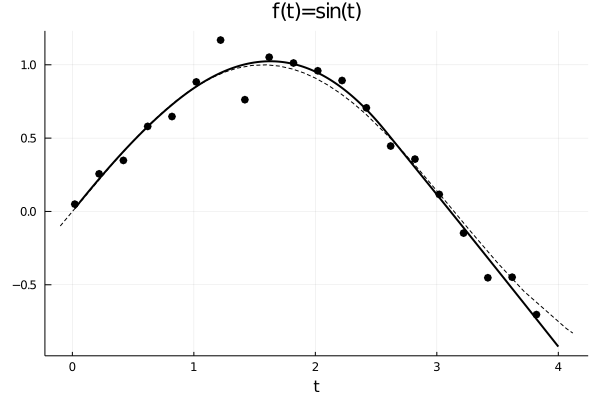

In [58]:
opt = ADAM(1e-2) 
x_dat = gen_dataset(std, sin)

W1 = init_std*randn(m, 2)
b1 = init_std*randn(m)
W2 = init_std*randn(2, m)
b2 = init_std*randn(2)

ps = Flux.params(W1,b1,W2,b2)
for i in 1:train_itr
    gs = gradient(ps) do
        DU_Euler(W1, b1, W2, b2, x_dat)
    end
    Flux.Optimise.update!(opt, ps, gs)
end

x = [Euler(i, W1,b1,W2,b2) for i in 1:N];
p1 = plot(η:η:T, x_dat, marker=:o, label = "Dataset", color=:black, xlabel="t", legend=false, title="f(t)=sin(t)")
plot!(x->sin(x), color=:black, ls=:dash)
plot!(η:η:T, x,  ls=:solid, lw=2, color=:black)

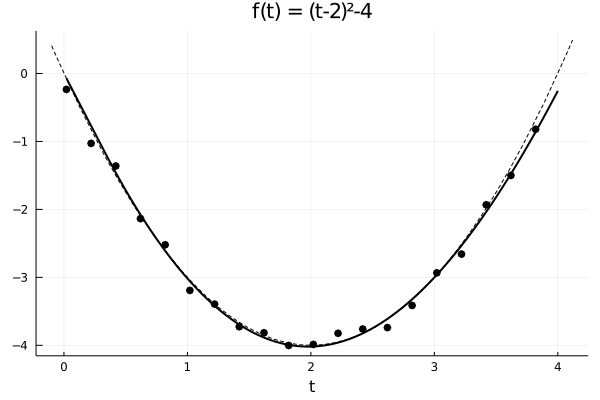

In [59]:
func(x) = (x-2)^2-4
x_dat = gen_dataset(std, func)

W1 = init_std*randn(m, 2)
b1 = init_std*randn(m)
W2 = init_std*randn(2, m)
b2 = init_std*randn(2)

ps = Flux.params(W1,b1,W2,b2)
for i in 1:train_itr
    gs = gradient(ps) do
        DU_Euler(W1, b1, W2, b2, x_dat)
    end
    Flux.Optimise.update!(opt, ps, gs)
end

x = [Euler(i, W1,b1,W2,b2) for i in 1:N];
p2 = plot(η:η:T, x_dat, marker=:o, label = "Dataset", color=:black, xlabel="t", legend=false, title="f(t) = (t-2)²-4")
plot!(x->func(x), color=:black, ls=:dash)
plot!(η:η:T, x,  ls=:solid, lw=2, color=:black)

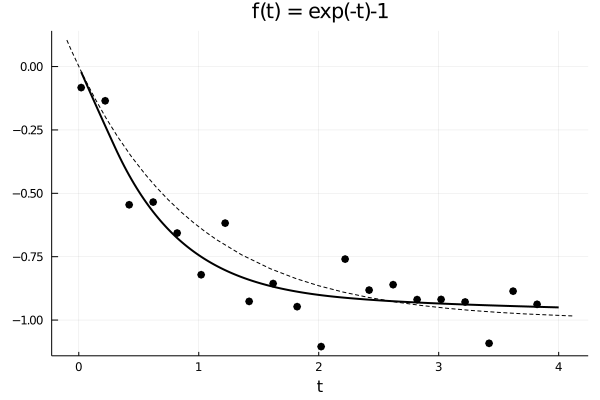

In [60]:
func(x) = exp(-x)-1
x_dat = gen_dataset(std, func)

W1 = init_std*randn(m, 2)
b1 = init_std*randn(m)
W2 = init_std*randn(2, m)
b2 = init_std*randn(2)

ps = Flux.params(W1,b1,W2,b2)
for i in 1:train_itr
    gs = gradient(ps) do
        DU_Euler(W1, b1, W2, b2, x_dat)
    end
    Flux.Optimise.update!(opt, ps, gs)
end

x = [Euler(i, W1,b1,W2,b2) for i in 1:N];
p3 = plot(η:η:T, x_dat, marker=:o, label = "Dataset", color=:black, xlabel="t", legend=false, title="f(t) = exp(-t)-1")
plot!(x->func(x), color=:black, ls=:dash)
plot!(η:η:T, x,  ls=:solid, lw=2, color=:black)

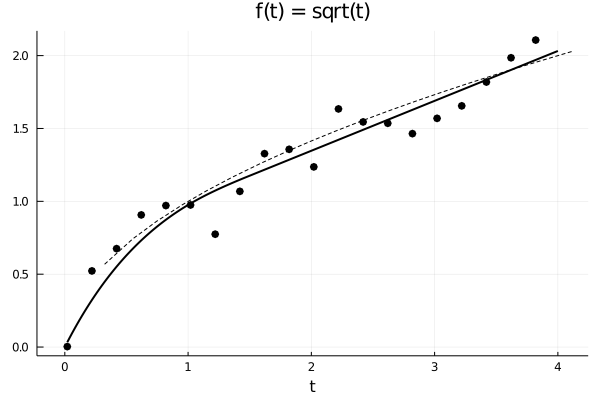

In [61]:
func(x) = x^0.5
x_dat = gen_dataset(std, func)

W1 = init_std*randn(m, 2)
b1 = init_std*randn(m)
W2 = init_std*randn(2, m)
b2 = init_std*randn(2)

ps = Flux.params(W1,b1,W2,b2)
for i in 1:train_itr
    gs = gradient(ps) do
        DU_Euler(W1, b1, W2, b2, x_dat)
    end
    Flux.Optimise.update!(opt, ps, gs)
end

x = [Euler(i, W1,b1,W2,b2) for i in 1:N];
p4 = plot(η:η:T, x_dat, marker=:o, label = "Dataset", color=:black, xlabel="t", legend=false, title="f(t) = sqrt(t)")
plot!(x->func(x), color=:black, ls=:dash)
plot!(η:η:T, x,  ls=:solid, lw=2, color=:black)

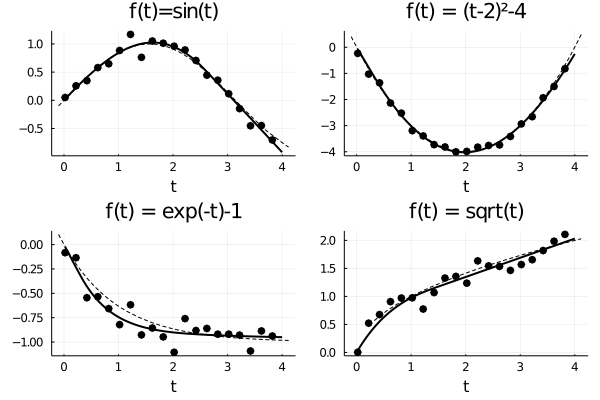

In [62]:
plot(p1,p2,p3,p4)

In [63]:
savefig("NeuralODE.pdf")